In [7]:
library(tidyverse)
library(tidymodels)
library(readxl)
library(RColorBrewer)

set.seed(99)

[1] "TABLE 1 - Training Data"


Study.Time.Goal,Repitition.Goal,Study.Time.Related,Exam.Performance.Related,Exam.Performance.Goal,Knowledge.Level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


[1] "TABLE 2 - Means of predictor variables (Study.Time.Goal, Repetition.Goal, Exam.Performance.Goal)"


Study.Time.Goal,Repitition.Goal,Exam.Performance.Goal
<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4585388


[1] "TABLE 3 - Number of observations of target variable (Knowledge.Level)"


`summarise()` ungrouping output (override with `.groups` argument)



Knowledge.Level,Number
<chr>,<int>
High,63
Low,83
Middle,88
very_low,24


[1] "TABLE 4 - Number of rows with missing values"


number_rows_missing
<int>
0


[1] "FIGURE 1 - Scatterplot of Training Data between study time and exam performance, coloured by knowledge level"


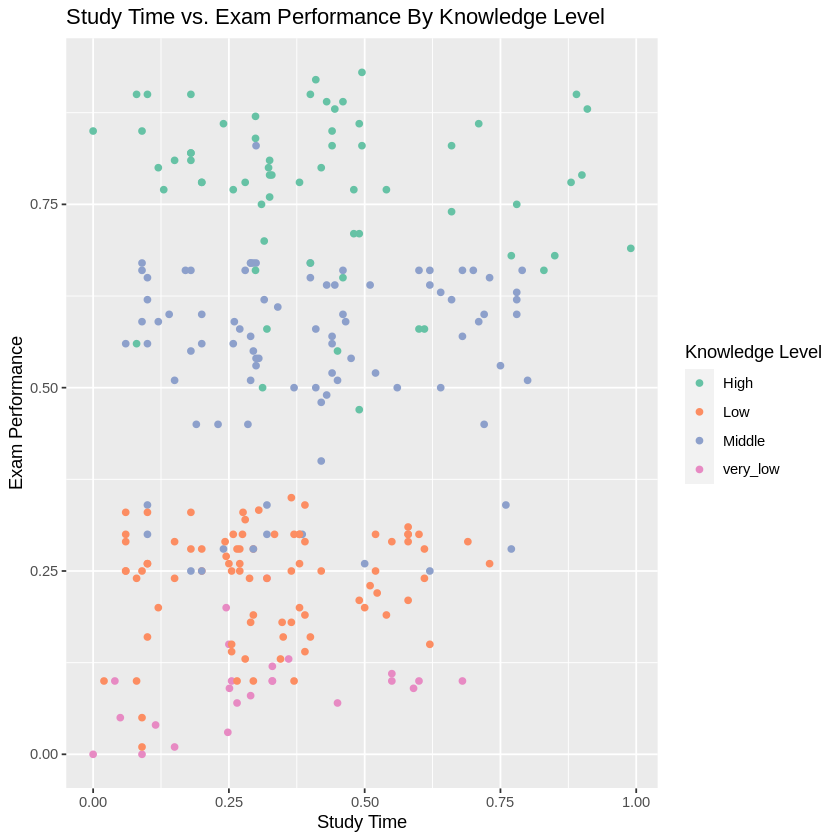

In [29]:
## -----------------------------------------------
## |                                             |
## |   READING TRAINING DATA + TIDYING DATA      |
## |                                             |
## -----------------------------------------------

print("TABLE 1 - Training Data")
## reading the Training_Data data frame from the User Knowledge .xls file into R

user_training <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 2, range = "A1:F259")
# user_training

## renaming the columns to more descriptive names

user_training <- rename(user_training,
                        Study.Time.Goal = STG,
                        Repitition.Goal = SCG,
                        Study.Time.Related = STR,
                        Exam.Performance.Related = LPR,
                        Exam.Performance.Goal = PEG,
                        Knowledge.Level = UNS)
# user_training


## converting the user knowledge column to a factor

user_training %>% mutate(Knowledge.Level = as_factor(Knowledge.Level))
# user_training


## -------------------------------
## |                             |
## |   USEFUL STATISTICS         |
## |                             |
## -------------------------------

## means of predictor variables (Study.Time.Goal, Repetition.Goal, Exam.Performance.Goal)

print("TABLE 2 - Means of predictor variables (Study.Time.Goal, Repetition.Goal, Exam.Performance.Goal)")
predictor_mean <- user_training %>% select(Study.Time.Goal, Repitition.Goal, Exam.Performance.Goal) %>% map_df(mean)
predictor_mean


## number of observations for target variable (Knowledge.Level)

print("TABLE 3 - Number of observations of target variable (Knowledge.Level)")
targ_obs <- user_training %>% group_by(Knowledge.Level) %>% summarize(Number = n())
targ_obs


## number of rows with missing values

print("TABLE 4 - Number of rows with missing values")
number_missing_value <- sum(is.na(user_training))
number_missing_table <- tibble(number_rows_missing = number_missing_value)
number_missing_table


## ---------------------------------------
## |                                     |
## |   PRELIMINARY VISUALIZATION         |
## |                                     |
## ---------------------------------------

print("FIGURE 1 - Scatterplot of Training Data between study time and exam performance, coloured by knowledge level")
## Scatterplot of study time vs. exam performance, coloured by knowledge level

study_vs_exam <- ggplot(user_training, 
                        aes(x = Study.Time.Goal, y = Exam.Performance.Goal, colour = Knowledge.Level)) + 
                        geom_point() + 
                        labs(x = "Study Time", y = "Exam Performance", colour = "Knowledge Level") + 
                        ggtitle("Study Time vs. Exam Performance By Knowledge Level") + 
                        scale_color_brewer(palette = "Set2")
study_vs_exam


In [25]:
set.seed(99)

## --------------------------------------------
## |                                          |
## |     READ TRAINING DATA + TIDY UP         |
## |                                          |
## --------------------------------------------

print("TABLE 5 - Testing Data")
## Load testing data
user_testing <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 3, range = "A1:F146") %>%
                rename(Study.Time.Goal = STG,
                        Repitition.Goal = SCG,
                        Study.Time.Related = STR,
                        Exam.Performance.Related = LPR,
                        Exam.Performance.Goal = PEG,
                        Knowledge.Level = UNS) %>%
                mutate(Knowledge.Level = as_factor(Knowledge.Level))

## Mutating testing data so that the Knowledge.Level factor column is consistent with the training data
user_testing$Knowledge.Level <- as.character(user_testing$Knowledge.Level)
user_testing[user_testing == "Very Low"] <- "very_low"
user_testing <- user_testing %>%
    mutate(Knowledge.Level = as.factor(Knowledge.Level))
user_testing

## ---------------------------------------
## |                                     |
## |     TUNING FOR BEST K VALUE         |
## |                                     |
## ---------------------------------------


## STEP 1 - Create recipe.

print("FIGURE 2 - Tuning Recipe")
user_recipe <- recipe(Knowledge.Level ~ Study.Time.Goal + Exam.Performance.Goal, data = user_training) %>%
        step_center(all_predictors()) %>%
        step_scale(all_predictors())
user_recipe

## STEP 2 - Create classification engine with tune().
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")


## STEP 3 - Tune grid and return a tibble with the accuracy for each neighbour k.
user_vfold <- vfold_cv(user_training, v = 5, strata = Knowledge.Level)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

print("TABLE 6 - Accuracy for each of the tested k neighbour values, sorted descending by accuracy")
user_results <- workflow() %>%
        add_recipe(user_recipe) %>%
        add_model(knn_tune) %>%
        tune_grid(resamples = user_vfold, grid = k_vals) %>%
        collect_metrics() %>%
        filter(.metric == "accuracy") %>%
        arrange(desc(mean))
user_results


## STEP 4 - Pull optimal k value.
optimal_neighbor <- user_results %>%
            slice(1) %>%
            pull(neighbors)
optimal_neighbor



[1] "TABLE 5 - Testing Data"


Study.Time.Goal,Repitition.Goal,Study.Time.Related,Exam.Performance.Related,Exam.Performance.Goal,Knowledge.Level
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,very_low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low
0.16,0.16,0.80,0.50,0.50,Middle
0.12,0.12,0.75,0.68,0.15,Low
0.20,0.20,0.88,0.77,0.80,High


[1] "FIGURE 2 - Tuning Recipe"


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Centering for all_predictors()
Scaling for all_predictors()

[1] "TABLE 6 - Accuracy for each of the tested k neighbour values, sorted descending by accuracy"


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5,accuracy,multiclass,0.8020468,5,0.024851859,Model03
15,accuracy,multiclass,0.8019685,5,0.020792462,Model08
11,accuracy,multiclass,0.7978960,5,0.026249021,Model06
3,accuracy,multiclass,0.7978901,5,0.026609389,Model02
7,accuracy,multiclass,0.7944270,5,0.025483341,Model04
19,accuracy,multiclass,0.7909583,5,0.021769261,Model10
13,accuracy,multiclass,0.7901978,5,0.028990983,Model07
37,accuracy,multiclass,0.7828916,5,0.018875243,Model19
35,accuracy,multiclass,0.7828162,5,0.014581017,Model18


[1] 5

[1] "FIGURE 3 - Graph of K-value vs. Accuracy"


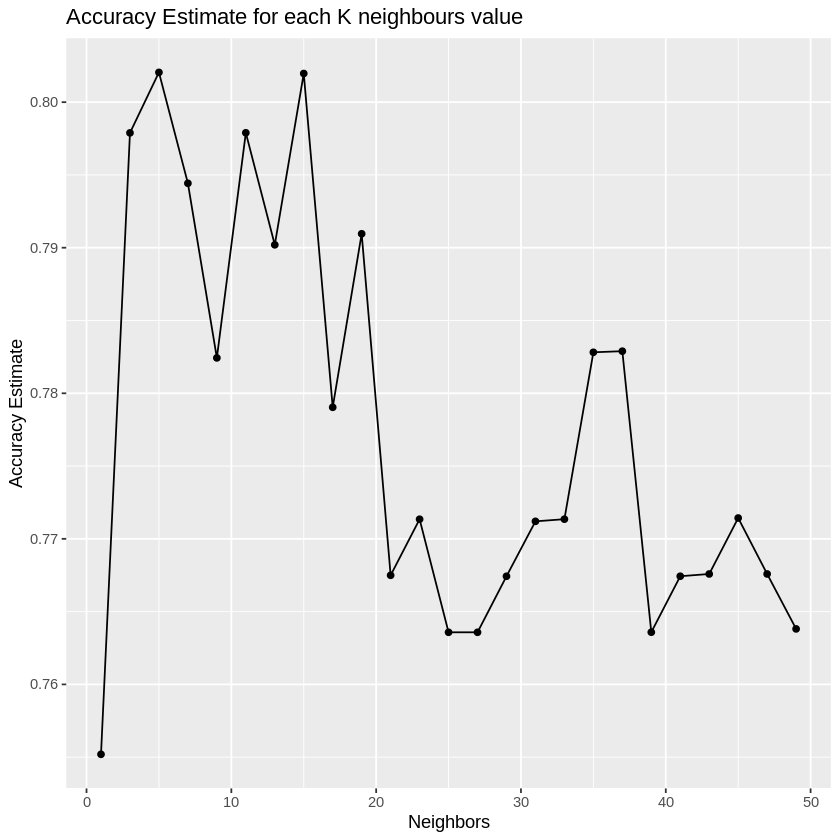

In [26]:
## ----------------------------------------
## |                                      |
## |     PLOT OF K VALUE VS ACCURACY      |
## |                                      |
## ----------------------------------------

print("FIGURE 3 - Graph of K-value vs. Accuracy")
accuracy_plot <- ggplot(user_results, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
        ggtitle("Accuracy Estimate for each K neighbours value")
accuracy_plot

In [28]:
## -----------------------------------------
## |                                       |
## |     PREDICT WITH OPTIMAL K VALUE      |
## |                                       |
## -----------------------------------------


## STEP 1 - Create engine using optimal k value (determined earlier).
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
      set_engine("kknn") %>%
      set_mode("classification")
                
## STEP 2 - Creating the workflow with the new recipe and fitting the training data.
user_workflow <- workflow() %>%
        add_recipe(user_recipe) %>%
        add_model(knn_spec) %>%
        fit(data = user_training)

## STEP 3 - Running the classification model to create a tibble with the original data plus the predicted class.
print("TABLE 7 - Classification predictions for testing data by the optimized model")
predictions <- user_workflow %>%
        predict(user_testing) %>%
        bind_cols(user_testing)
predictions

## STEP 4 - Collect the accuracy and other metrics of the predictions.
print("TABLE 8 - Accuracy of the classification predictions on the testing data")
predictions_metrics <- predictions %>%
      metrics(truth = Knowledge.Level, estimate = .pred_class)
predictions_metrics



[1] "TABLE 7 - Classification predictions for testing data by the optimized model"


.pred_class,Study.Time.Goal,Repitition.Goal,Study.Time.Related,Exam.Performance.Related,Exam.Performance.Goal,Knowledge.Level
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
very_low,0.00,0.10,0.50,0.26,0.05,very_low
Low,0.05,0.05,0.55,0.60,0.14,Low
High,0.08,0.18,0.63,0.60,0.85,High
High,0.20,0.20,0.68,0.67,0.85,High
High,0.22,0.22,0.90,0.30,0.90,High
Low,0.14,0.14,0.70,0.50,0.30,Low
Middle,0.16,0.16,0.80,0.50,0.50,Middle
Low,0.12,0.12,0.75,0.68,0.15,Low
High,0.20,0.20,0.88,0.77,0.80,High


[1] "TABLE 8 - Accuracy of the classification predictions on the testing data"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8068966
kap,multiclass,0.7341540


[1] "FIGURE 4 - Accuracy of the prediction model in classifying the Testing Data"


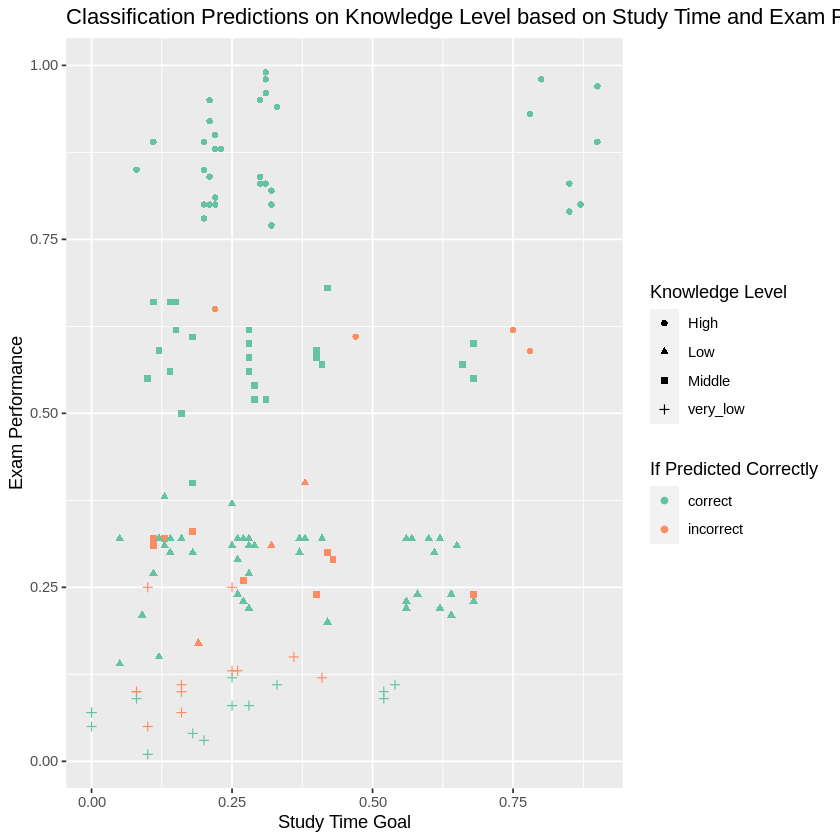

[1] "FIGURE 5 - Scatterplot of Testing Data between study time and exam performance, coloured by knowledge level"


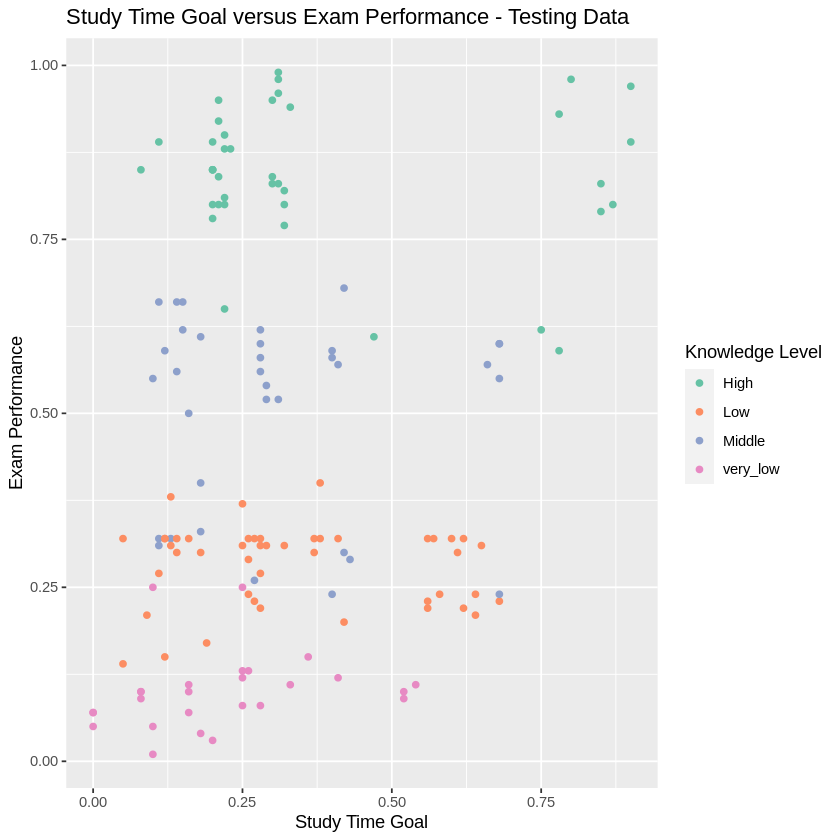

In [33]:
## -------------------------------------
## |                                   |
## |     VISUZLIZING PREDICTIONS       |
## |                                   |
## -------------------------------------

## Assigning each point a value based on whether they were predicted correctly ("correct") or incorrectly ("incorrect")
predictions_true_data <- predictions %>%
    mutate(correct = ifelse(Knowledge.Level == .pred_class, "correct", "incorrect"))
#predictions_true_data


## Graph of testing data, coloured by whether they were predicted correctly or not.
print("FIGURE 4 - Accuracy of the prediction model in classifying the Testing Data")
predictions_true_graph <- ggplot(predictions_true_data, 
                        aes(x = Study.Time.Goal, y = Exam.Performance.Goal, colour = correct, shape = Knowledge.Level)) + 
                        geom_point() + 
                        labs(x = "Study Time Goal", y = "Exam Performance", colour = "If Predicted Correctly", shape = "Knowledge Level") + 
                        ggtitle("Classification Predictions on Knowledge Level based on Study Time and Exam Performance") +
                        scale_color_brewer(palette = "Set2")
predictions_true_graph

## Graph of testing data (for reference)

predictions_original_graph <- ggplot(predictions_true_data, 
                        aes(x = Study.Time.Goal, y = Exam.Performance.Goal, colour = Knowledge.Level)) + 
                        geom_point() + 
                        labs(x = "Study Time Goal", y = "Exam Performance", colour = "Knowledge Level") + 
                        ggtitle("Study Time Goal versus Exam Performance - Testing Data") +
                        scale_color_brewer(palette = "Set2")
predictions_original_graph
print("FIGURE 5 - Scatterplot of Testing Data between study time and exam performance, coloured by knowledge level")
